# Assignment 1
## Neural Networks
## PGCP DSML IITR-TimesPro
### Submitted by - Sylvia Chadha


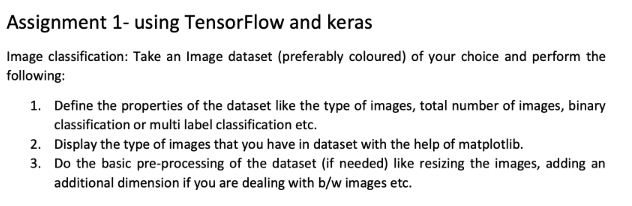

## CIFAR-10 Dataset

### Importing libraries and Loading Dataset

In [1]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [3]:
print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [4]:
# Load label names
import pickle

# Open meta file and load label names
with open('datasets/batches.meta', 'rb') as f:
    meta = pickle.load(f)
label_names = meta['label_names']

label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
# Convert integer labels to class names - to be used when plotting images

y_train_names = np.array([label_names[y] for y in y_train[:,0]])
y_test_names = np.array([label_names[y] for y in y_test[:,0]])

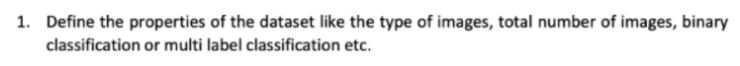

**Shape**

In [6]:
# Print the shape of the training and test data
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


There are 50,000 training images of size 32x32 and since channel value=3, it is colored images. There are 10,000 test images.

**Datatype**

In [7]:
print(type(x_train),type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


We have data/images in form of numpy arrays.

**Target Class**

In [8]:
classes = np.unique(y_train)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
len(classes)

10

There are 10 classes for the target variable and hence it is a multi-class classifcation problem.

In [10]:
print(label_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


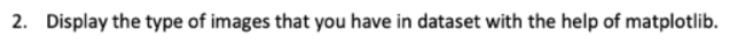

**Display Data using matplotlib**

We pick some images to display the type of data in the dataset and plot with their class names i.e. the ground truth label for the image.

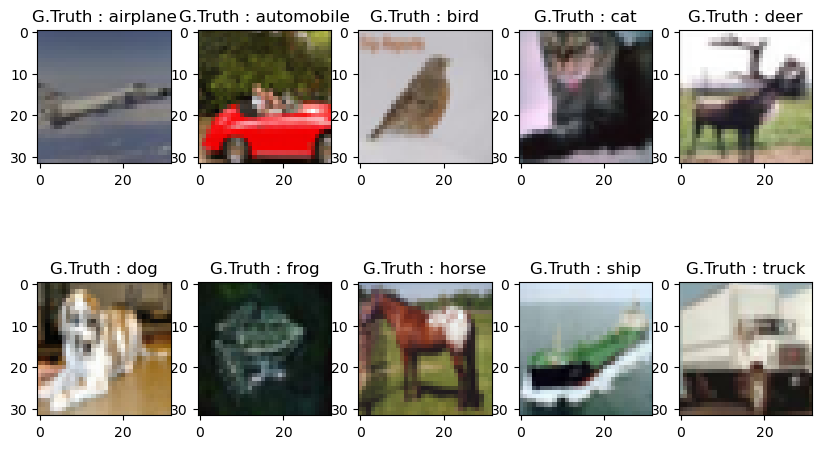

In [11]:
fig, ax = plt.subplots(2, 5, figsize=(10, 6))

ax[0,0].imshow(x_train[564,:,:])
ax[0,0].set_title("G.Truth : {}".format(y_train_names[564]));
ax[0,1].imshow(x_train[99,:,:])
ax[0,1].set_title("G.Truth : {}".format(y_train_names[99]));
ax[0,2].imshow(x_train[108,:,:])
ax[0,2].set_title("G.Truth : {}".format(y_train_names[108]));
ax[0,3].imshow(x_train[8880,:,:])
ax[0,3].set_title("G.Truth : {}".format(y_train_names[8880]));
ax[0,4].imshow(x_train[9061,:,:])
ax[0,4].set_title("G.Truth : {}".format(y_train_names[9061]));


ax[1,0].imshow(x_train[1111,:,:])
ax[1,0].set_title("G.Truth : {}".format(y_train_names[1111]));
ax[1,1].imshow(x_train[781,:,:])
ax[1,1].set_title("G.Truth : {}".format(y_train_names[781]));
ax[1,2].imshow(x_train[1900,:,:])
ax[1,2].set_title("G.Truth : {}".format(y_train_names[1900]));
ax[1,3].imshow(x_train[190,:,:])
ax[1,3].set_title("G.Truth : {}".format(y_train_names[190]));
ax[1,4].imshow(x_train[444,:,:])
ax[1,4].set_title("G.Truth : {}".format(y_train_names[444]));




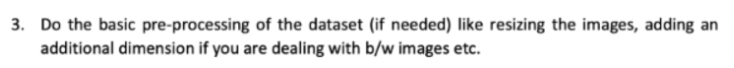

**Pre-processing Data**

1. **Size** - For Cifar dataset all the images are 32x32, image resizing may not be necessary.
2. **Dimensions** - For Cifar images are colored so they are already loaded as a 3-Dimensional data with shape (32, 32, 3), adding dimension will not be necessary as is case for greyscale images.
3. **Normalization** - The data is in an int8 format, so before feed it into the network convert its type to change to float32, and also rescale the pixel values in range 0 - 1 inclusive i.e. perform normalization of data.
4. **Encoding** - One-hot encoding integer labels can be done which can be helpful while modelling.

In [12]:
x_train.dtype

dtype('uint8')

**Normalization**

In [13]:
train_X = x_train.astype('float32')
test_X = x_test.astype('float32')
train_X = x_train / 255.
test_X = x_test / 255.

**One-hot encoding**

In [14]:
from tensorflow.keras.utils import to_categorical

# Change the labels from categorical to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes = 10)
y_test_one_hot = to_categorical(y_test, num_classes = 10)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', y_train_one_hot[0])

Original label: [6]
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
